# Happy House 

Problem Definition :- In Happy House , A party is going to start and if you want to enter the house , you will be allowed into the house only if you smile at the camera.We have a training set of 600 images and a testing set of 150 images

## 1.Importing Libraries

In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

## 2.Importing Data

In [6]:
train_data = h5py.File('datasets/train_happy.h5', "r")

# your train set features
train_set_x_orig = np.array(train_data["train_set_x"][:])
# your train set labels
train_set_y_orig = np.array(train_data["train_set_y"][:]) 

test_data = h5py.File('datasets/test_happy.h5', "r")
# your test set features
test_set_x_orig = np.array(test_data["test_set_x"][:])
# your test set labels
test_set_y_orig = np.array(test_data["test_set_y"][:]) 
# the list of classes
classes = np.array(test_dataset["list_classes"][:]) 

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

## 3.Cleaning and Exploring Data

In [10]:
X_train_orig = train_set_x_orig
X_test_orig  = test_set_x_orig
Y_train_orig = train_set_y_orig
Y_test_orig  = test_set_y_orig

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## 4.Model 

In [11]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    
    X_input = Input(input_shape)
    print('At start')
    print(X_input.shape)
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    print('after padding')
    print(X.shape)
    # CONV -> BN -> RELU Block applied to X
    
    #Conv1
    X = Conv2D(8, (7, 7), strides = (1, 1), name = 'conv0')(X)
    print('after 1st conv2d 32, 7,7 ')
    print(X.shape)
    #BN1
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    print('after  1st batch normalization 3')
    print(X.shape)
    #Relu1
    X = Activation('relu')(X)
    print('after 1st relu')
    print(X.shape)
    
    # MAXPOOL1
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    print('after Max pooling')
    print(X.shape)
    
    #Conv2
    X = Conv2D(32, (1, 1), strides = (1, 1), name = 'conv2')(X)
    print('after 2nd conv2d 32,(2,2) ')
    print(X.shape)
    #BN2
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    print('after  2nd batch normalization 3')
    print(X.shape)
    #Relu2
    X = Activation('relu')(X)
    print('after 2nd relu')
    print(X.shape)
    
    # MAXPOOL2
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    print('after Max pooling')
    print(X.shape)
    
    
    #Conv3
    X = Conv2D(64, (1, 1), strides = (1, 1), name = 'conv3')(X)
    print('after 3rd conv2d 16,(2,2) ')
    print(X.shape)
    #BN3
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    print('after  3rd batch normalization 3')
    print(X.shape)
    #Relu3
    X = Activation('relu')(X)
    print('after 3rd relu')
    print(X.shape)
    
    # MAXPOOL3
    X = MaxPooling2D((4, 4), name='max_pool3')(X)
    print('after Max pooling')
    print(X.shape)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    print('after Flattening it')
    print(X.shape)
    
    X = Dense(1, activation='sigmoid', name='fc')(X)
    print('after dense layer')
    print(X.shape)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')


    
    
    return model

In [12]:
# Creating Model
happyModel = HappyModel((64,64,3))

At start
(?, 64, 64, 3)
after padding
(?, 70, 70, 3)
after 1st conv2d 32, 7,7 
(?, 64, 64, 8)
after  1st batch normalization 3
(?, 64, 64, 8)
after 1st relu
(?, 64, 64, 8)
after Max pooling
(?, 32, 32, 8)
after 2nd conv2d 32,(2,2) 
(?, 32, 32, 32)
after  2nd batch normalization 3
(?, 32, 32, 32)
after 2nd relu
(?, 32, 32, 32)
after Max pooling
(?, 16, 16, 32)
after 3rd conv2d 16,(2,2) 
(?, 16, 16, 64)
after  3rd batch normalization 3
(?, 16, 16, 64)
after 3rd relu
(?, 16, 16, 64)
after Max pooling
(?, 4, 4, 64)
after Flattening it
(?, ?)
after dense layer
(?, 1)


In [13]:
#Compiling the model and here I am using Adam Optimizer and 
#Mean_squared_error is used to calculate the loss with accuracy as metric
happyModel.compile(optimizer = "Adam", loss = "mean_squared_error", metrics = ["accuracy"])


In [14]:
#Training the model 
happyModel.fit(x = X_train,y = Y_train,epochs = 50, batch_size = 16)

Epoch 1/50
600/600 [==============================] - 11s - loss: 0.2029 - acc: 0.6900    
Epoch 2/50
600/600 [==============================] - 11s - loss: 0.1300 - acc: 0.8317    
Epoch 3/50
600/600 [==============================] - 11s - loss: 0.0939 - acc: 0.8833    
Epoch 4/50
600/600 [==============================] - 11s - loss: 0.0660 - acc: 0.9400    
Epoch 5/50
600/600 [==============================] - 11s - loss: 0.0535 - acc: 0.9567    
Epoch 6/50
600/600 [==============================] - 11s - loss: 0.0402 - acc: 0.9650    
Epoch 7/50
600/600 [==============================] - 11s - loss: 0.0333 - acc: 0.9750    
Epoch 8/50
600/600 [==============================] - 11s - loss: 0.0287 - acc: 0.9817    
Epoch 9/50
600/600 [==============================] - 11s - loss: 0.0306 - acc: 0.9683    
Epoch 10/50
600/600 [==============================] - 11s - loss: 0.0287 - acc: 0.9750    
Epoch 11/50
600/600 [==============================] - 11s - loss: 0.0256 - acc: 0.9767  

In [15]:
#Testing and evaluation of model
preds = happyModel.evaluate(x = X_test, y = Y_test)
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s     

Loss = 0.0282090304295
Test Accuracy = 0.973333337307


# Conclusion


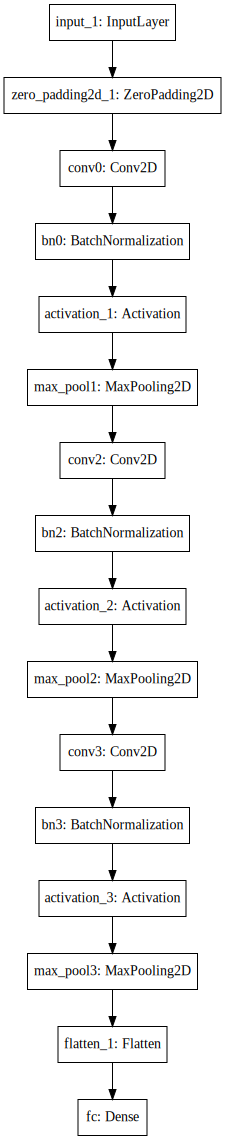

In [16]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))